# EDA on 2015-2021 Legacy.com obituaries confirmed in DC

Author: Jaren Haber, PhD <br/>
Date: July 27, 2022 <br/>
Description: Exploratory data analysis (EDA) on postprocessed datasets for 2015-2021 obituaries scraped from Legacy.com in June 2022. 

## Import packages

In [1]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from ast import literal_eval

## Load & prepare data

In [2]:
# Set file paths
root = 'June_2022_postprocessed/'
stem = 'final_df_duplicates_identified-'
fpmerged = os.path.join(root, stem+'2015-2021.csv')
fpdc = os.path.join(root, stem+'2015-2021_dc.csv')

In [3]:
dcdf = pd.read_csv(fpdc, low_memory=False) # load full dataset

In [4]:
# prepare data
dcdf['tokens'] = dcdf['tokens'].apply(literal_eval) # recover string format from list in csv file

dcdf = dcdf.dropna(subset=['death_year']) # remove if no deathyear
dcdf = dcdf[dcdf['pub_year']>2014] # remove if erroneous publication year
dcdf['duplicate_remove'].fillna(0.0, inplace=True) # fill in duplicates: if None, replace with zero
dcdf = dcdf[dcdf['duplicate_remove']==0.0] # remove if duplicate
dcdf = dcdf[dcdf['death_year']>=2000] # Remove if death_year before 2000

grouped_year = dcdf.groupby(by='death_year') # group obits by year of DOD
grouped_month = dcdf.groupby(by='death_month') # group obits by month of DOD

## Exploratory data analysis

### What proportion of obituaries are in funeral homes?

In [5]:
print('Total # in funeral homes:\t', dcdf['funeral_home'].sum())
print('Proportion in funeral homes:\t', dcdf['funeral_home'].mean())
print()
print('Stats:')
print(dcdf['funeral_home'].describe())

Total # in funeral homes:	 23026
Proportion in funeral homes:	 0.7289246256608313

Stats:
count     31589
unique        2
top        True
freq      23026
Name: funeral_home, dtype: object


### How many obituaries are confirmed in DC each year?

<AxesSubplot:>

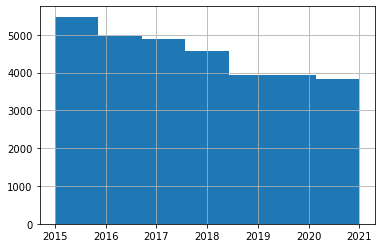

In [6]:
# Number published in each year observed
dcdf['pub_year'].hist(bins=7)

<AxesSubplot:>

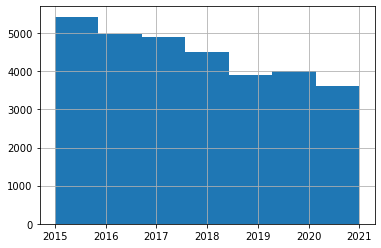

In [7]:
# Actual death year (in time range)
dcdf[dcdf['death_year']>2014]['death_year'].hist(bins=7)

### How many obituaries are confirmed in DC each month?

<AxesSubplot:>

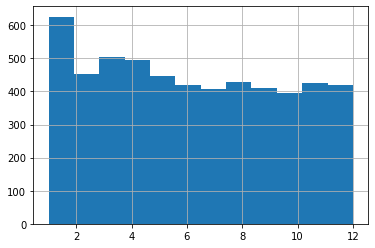

In [8]:
# Number published in each month of 2015
dcdf[dcdf['death_year']==2015.0]['death_month'].hist(bins=12)

<AxesSubplot:>

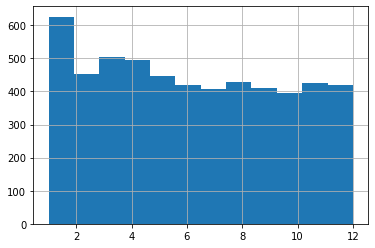

In [9]:
# Actual death year in each month of 2015
dcdf[dcdf['death_year']==2015]['death_month'].hist(bins=12)

In [10]:
for year in list(range(2015,2022)): # loop over years
    print(f'Confirmed deaths in DC per month in {year}:')
    tempyear_df = dcdf[dcdf['death_year']==float(year)] # restrict to this year
    
    for month in list(range(1,13)): # loop over months
        tempmonth_df = tempyear_df[tempyear_df['death_month']==float(month)]
        numdeaths = len(tempmonth_df)
        print(f'\t{month}: {numdeaths} deaths')
        #print(f'{numdeaths}')
    print()

Confirmed deaths in DC per month in 2015:
	1: 626 deaths
	2: 452 deaths
	3: 504 deaths
	4: 494 deaths
	5: 448 deaths
	6: 421 deaths
	7: 406 deaths
	8: 429 deaths
	9: 409 deaths
	10: 396 deaths
	11: 425 deaths
	12: 419 deaths

Confirmed deaths in DC per month in 2016:
	1: 476 deaths
	2: 432 deaths
	3: 442 deaths
	4: 426 deaths
	5: 377 deaths
	6: 388 deaths
	7: 401 deaths
	8: 358 deaths
	9: 398 deaths
	10: 449 deaths
	11: 392 deaths
	12: 439 deaths

Confirmed deaths in DC per month in 2017:
	1: 436 deaths
	2: 415 deaths
	3: 431 deaths
	4: 383 deaths
	5: 409 deaths
	6: 381 deaths
	7: 409 deaths
	8: 416 deaths
	9: 378 deaths
	10: 419 deaths
	11: 373 deaths
	12: 435 deaths

Confirmed deaths in DC per month in 2018:
	1: 511 deaths
	2: 438 deaths
	3: 431 deaths
	4: 370 deaths
	5: 353 deaths
	6: 351 deaths
	7: 325 deaths
	8: 345 deaths
	9: 319 deaths
	10: 349 deaths
	11: 340 deaths
	12: 378 deaths

Confirmed deaths in DC per month in 2019:
	1: 393 deaths
	2: 338 deaths
	3: 369 deaths
	4: 314 d

### Describe the lag between death date and obituary publication date

CAVEAT: Where bday_method or dday_methodis "scraped" AND birthday or deathdayis January 1st of some year, we should assume we only know year of birth/death (ignore the Jan. 1st part of the date), since in most cases the website will only include the year in the HTML (i.e., Legacy will show something like "1950 -2020" in the left column below the name).

In [11]:
dcdf.lag.describe()

count    31589.000000
mean        20.082339
std        153.763957
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max       6424.000000
Name: lag, dtype: float64